In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Name of columns
list(data.columns)

['index',
 'having_IPhaving_IP_Address',
 'URLURL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [4]:
#To check missing values in Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [5]:
#According to the Data descrition, these are the meaning of the values in the data
#1 means legitimate
#0 is suspicious
#-1 is phishing
for col in data.columns:
    unique_value_list = data[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index has 11055 unique values
having_IPhaving_IP_Address contains:			[-1  1]
URLURL_Length contains:			[ 1  0 -1]
Shortining_Service contains:			[ 1 -1]
having_At_Symbol contains:			[ 1 -1]
double_slash_redirecting contains:			[-1  1]
Prefix_Suffix contains:			[-1  1]
having_Sub_Domain contains:			[-1  0  1]
SSLfinal_State contains:			[-1  1  0]
Domain_registeration_length contains:			[-1  1]
Favicon contains:			[ 1 -1]
port contains:			[ 1 -1]
HTTPS_token contains:			[-1  1]
Request_URL contains:			[ 1 -1]
URL_of_Anchor contains:			[-1  0  1]
Links_in_tags contains:			[ 1 -1  0]
SFH contains:			[-1  1  0]
Submitting_to_email contains:			[-1  1]
Abnormal_URL contains:			[-1  1]
Redirect contains:			[0 1]
on_mouseover contains:			[ 1 -1]
RightClick contains:			[ 1 -1]
popUpWidnow contains:			[ 1 -1]
Iframe contains:			[ 1 -1]
age_of_domain contains:			[-1  1]
DNSRecord contains:			[-1  1]
web_traffic contains:			[-1  0  1]
Page_Rank contains:			[-1  1]
Google_Index contains:			[ 1 -1]
L

0 times 0 repeated in Result
4898 times -1 repeated in Result
6157 times 1 repeated in Result


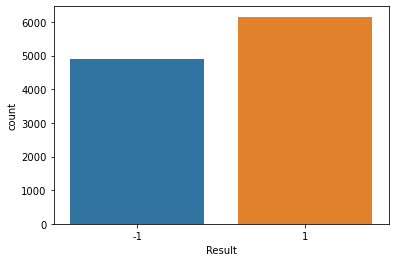

In [6]:
a=len(data[data.Result==0])
b=len(data[data.Result==-1])
c=len(data[data.Result==1])
print(a,"times 0 repeated in Result")
print(b,"times -1 repeated in Result")
print(c,"times 1 repeated in Result")
sns.countplot(data['Result'])

In [7]:
Y = data['Result']
X = data.drop('Result', axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

# Support Vector Machine

In [9]:
svm =SVC()
svm.fit(X_train, y_train)

SVC()

In [10]:
y_pred=svm.predict(X_test)

In [11]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 55.351220982815796


# CART


In [12]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1388   93]
 [  82 1754]]
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1481
           1       0.95      0.96      0.95      1836

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [15]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 94.72414832680133


# Perceptron

In [16]:
ppn = Perceptron(max_iter=1000, eta0=0.005, random_state=0)

In [17]:
ppn.fit(X_train, y_train)

Perceptron(eta0=0.005)

In [18]:
y_pred = ppn.predict(X_test)
print(round(accuracy_score(y_test, y_pred.round())*100, 2))

44.59


# Random Forest

In [19]:
rnd_forest = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state= 0)

In [20]:
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=900, random_state=0)

In [21]:
y_pred = rnd_forest.predict(X_test)
print(round(accuracy_score(y_test, y_pred)*100, 2))

97.11


# Logistic Regression

In [22]:
logc_reg = LogisticRegression()

In [23]:
logc_reg.fit(X_train, y_train)

c:\users\gaura\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = logc_reg.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

92.04100090443171


In [25]:
results = pd.DataFrame({
    'Model':['Support Vector Machine','Logistic Regression','Random Forest','Perceptron','CART']})

# Comparison


In [26]:
for i in range (5, 0, -1):
    col = 'Split- ' + str((10-i)*10) +':' + str(i*10)
    lst = []
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=i/10)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    lst.append(round(accuracy_score(y_test, y_pred)*100))
    logc_reg.fit(X_train, y_train)
    y_pred = logc_reg.predict(X_test)
    lst.append(round(accuracy_score(y_test, y_pred.round())*100, 2))
    rnd_forest.fit(X_train, y_train)
    y_pred = rnd_forest.predict(X_test)
    lst.append(round(accuracy_score(y_test, y_pred)*100, 2))
    ppn.fit(X_train, y_train)
    y_pred = ppn.predict(X_test)
    lst.append(round(accuracy_score(y_test, y_pred.round())*100, 2))
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    lst.append(round(accuracy_score(y_test, y_pred)*100, 2))
    results[col] = lst


c:\users\gaura\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gaura\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [27]:
results

,Model,Split- 50:50,Split- 60:40,Split- 70:30,Split- 80:20,Split- 90:10
0,Support Vector Machine,55.00,56.00,55.00,56.00,56.00
1,Logistic Regression,92.69,92.85,91.92,92.49,93.49
2,Random Forest,96.40,96.88,96.53,97.01,97.38
3,Perceptron,46.33,44.03,55.26,44.01,44.30
4,CART,94.05,95.02,94.78,95.70,95.93


In [28]:
corr = data.corr()
corr

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


In [29]:
corr = corr['Result'].to_dict()
corr

{'index': 0.0009776798698125954,
 'having_IPhaving_IP_Address': 0.09416009495619791,
 'URLURL_Length': 0.05742962926609729,
 'Shortining_Service': -0.06796589265931875,
 'having_At_Symbol': 0.0529477893589303,
 'double_slash_redirecting': -0.03860761195594768,
 'Prefix_Suffix': 0.34860557031816325,
 'having_Sub_Domain': 0.29832332377007215,
 'SSLfinal_State': 0.7147411951749943,
 'Domain_registeration_length': -0.22578946245859327,
 'Favicon': -0.0002795246949453605,
 'port': 0.0364188509138546,
 'HTTPS_token': -0.03985389543680518,
 'Request_URL': 0.25337227167181076,
 'URL_of_Anchor': 0.6929345205555435,
 'Links_in_tags': 0.24822851539084026,
 'SFH': 0.2214190081034698,
 'Submitting_to_email': 0.018249008647122554,
 'Abnormal_URL': -0.06048764182075961,
 'Redirect': -0.020113461657570678,
 'on_mouseover': 0.04183843997871133,
 'RightClick': 0.012653234917093241,
 'popUpWidnow': 8.588679256218022e-05,
 'Iframe': -0.0033935238644635275,
 'age_of_domain': 0.12149641654725772,
 'DNSRecor

In [30]:
#most correlated features
res = sorted(corr, key=lambda x:abs(corr.get(x,0)), reverse= True)
res

['Result',
 'SSLfinal_State',
 'URL_of_Anchor',
 'Prefix_Suffix',
 'web_traffic',
 'having_Sub_Domain',
 'Request_URL',
 'Links_in_tags',
 'Domain_registeration_length',
 'SFH',
 'Google_Index',
 'age_of_domain',
 'Page_Rank',
 'having_IPhaving_IP_Address',
 'Statistical_report',
 'DNSRecord',
 'Shortining_Service',
 'Abnormal_URL',
 'URLURL_Length',
 'having_At_Symbol',
 'on_mouseover',
 'HTTPS_token',
 'double_slash_redirecting',
 'port',
 'Links_pointing_to_page',
 'Redirect',
 'Submitting_to_email',
 'RightClick',
 'Iframe',
 'index',
 'Favicon',
 'popUpWidnow']

In [31]:
#displaying top 11 features including result 
new_df = data[res[:11]]
new_df.head()

,Result,SSLfinal_State,URL_of_Anchor,Prefix_Suffix,web_traffic,having_Sub_Domain,Request_URL,Links_in_tags,Domain_registeration_length,SFH,Google_Index
0,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1
1,-1,1,0,-1,0,0,1,-1,-1,-1,1
2,-1,-1,0,-1,1,-1,1,-1,-1,-1,1
3,-1,-1,0,-1,1,-1,-1,0,1,-1,1
4,1,1,0,-1,0,1,1,0,-1,-1,1


In [32]:
#dropping resultant column
Y= new_df['Result']
X= new_df.drop('Result', axis=1)

In [33]:
#dataframe for different model
diff_models = pd.DataFrame({
    'Model' : ['Support Vector Machine','Logistic Regression', 'Random Forest', 'Perceptron','CART']
})

In [34]:
#displaying accuracy of all algorithms using top 10 features
col = 'Top 10 features'
lst = []
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
#support vector machine
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
lst.append(round(accuracy_score(y_test, y_pred)*100))
#logistic regression
logc_reg.fit(X_train, y_train)
y_pred = logc_reg.predict(X_test)
lst.append(round(accuracy_score(y_test, y_pred.round())*100, 2))
#random forest
rnd_forest.fit(X_train, y_train)
y_pred = rnd_forest.predict(X_test)
lst.append(round(accuracy_score(y_test, y_pred)*100, 2))
#perceptron
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
lst.append(round(accuracy_score(y_test, y_pred.round())*100, 2))
classifier.fit(X_train, y_train)
#cart
y_pred = classifier.predict(X_test)
lst.append(round(accuracy_score(y_test, y_pred)*100, 2))
diff_models[col] = lst


In [35]:
#display the results
diff_models

,Model,Top 10 features
0,Support Vector Machine,93.00
1,Logistic Regression,92.10
2,Random Forest,94.42
3,Perceptron,85.59
4,CART,94.21
